# Convolutional Neural Network

### 0. Basic Useful Setups:

In [1]:
### Basic setups
import sys
sys.path.append('./models/')
# Enable automatic reload of libraries
%load_ext autoreload
# All modules are reloaded before every comment
%autoreload 2b
import keras

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


### 1. Read MNIST using Keras

In [2]:
from utils import load_mnist
(x_train, y_train), (x_test, y_test) = load_mnist()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

### 1. Load LetNet Model

In [4]:
from keras.utils.vis_utils import plot_model # can be used to plot the model into a png file.
from LeNet import LeNet
NUM_CLASSES = 10
model = LeNet(num_classes = NUM_CLASSES)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
# You can save the model by specifying a path
# modelPath = ____
# model.save(modelPath)

# You can also print out the model by typing
model.summary()

# You can plot the model into a png file and use it in your report.
pngModelPath = "model.png"
plot_model(model, to_file=pngModelPath, show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 28, 28, 20)        520       
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 14, 14, 20)        0         
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 14, 14, 50)        25050     
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 7, 7, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2450)              0         
_________________________________________________________________
fc1 (Dense)                  (None, 500)               1225500   
__________

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

### 2. Train and Evaluate LeNet Model

In [21]:
# train model
BATCH_SIZE = 128
MAX_EPOCH = 30

model_info = model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=MAX_EPOCH,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 103us/step - loss: 0.1845 - acc: 0.9415 - val_loss: 0.0416 - val_acc: 0.9861
Epoch 2/30
60000/60000 [==============================] - 5s 88us/step - loss: 0.0459 - acc: 0.9855 - val_loss: 0.0349 - val_acc: 0.9878
Epoch 3/30
60000/60000 [==============================] - 5s 89us/step - loss: 0.0306 - acc: 0.9904 - val_loss: 0.0247 - val_acc: 0.9918
Epoch 4/30
60000/60000 [==============================] - 5s 89us/step - loss: 0.0218 - acc: 0.9930 - val_loss: 0.0214 - val_acc: 0.9927
Epoch 5/30
60000/60000 [==============================] - 5s 89us/step - loss: 0.0154 - acc: 0.9952 - val_loss: 0.0254 - val_acc: 0.9905
Epoch 6/30
60000/60000 [==============================] - 5s 89us/step - loss: 0.0113 - acc: 0.9965 - val_loss: 0.0235 - val_acc: 0.9921
Epoch 7/30
60000/60000 [==============================] - 5s 89us/step - loss: 0.0083 - acc: 0.9976 - val_loss: 0.0217 - val_ac

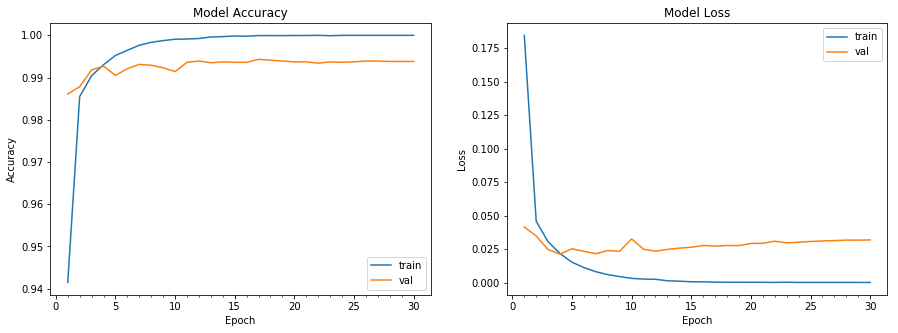

In [22]:
import matplotlib.pyplot as plt
import numpy as np
plot_model_history(model_info)

Here in this LeNet model, I have set the batch size as 128 and maximum epoch as 30 to see a smoother and clearer overall view. The detailed architechture is shown previously.

As we can see from the plotted results, starting from the 4th epoch (8th iteration), the validation lost starts to rise back up and tend to be stablized. By using GPU this Neural network can be trained efficiently.

The final test loss is 0.032 and the test accuracy is 0.9938, though the MNIST dataset is a well-organized, weird dataset (balanced, centered, small...), the result is pretty amazing already.

# 1-Nearest Neighbor

In [5]:
import numpy as np
labels = np.array(range(10)).reshape((10,1))
x_train_flatten = x_train.reshape((x_train.shape[0], -1))
x_test_flatten = x_test.reshape((x_test.shape[0], -1))
y_train_labels = np.dot(y_train, labels).reshape((y_train.shape[0], ))
y_test_labels = np.dot(y_test, labels).reshape((y_test.shape[0], ))

In [7]:
def distance(x1, x2):
    return np.sqrt(np.dot(x1-x2, x1-x2))

In [8]:
def NN(x):
    dis = np.array([distance(x,xp) for xp in x_train_flatten] )
    return y_train_labels[int(np.argmin(dis))]

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_train_flatten, y_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [11]:
%%time
y_test_predict = neigh.predict(x_test_flatten)

Wall time: 14min 43s


In [25]:
neigh.score(x_test_flatten, y_test_labels)

0.9691

In this section, I have applied 1-Nearest Neighbor classifier on the MNIST dataset. As we all know, one big con of this classifier is running time grows exponentially as the size of data set grows.

For MNIST, it took about 15 minutes to train the model.

One trick to speed up the training process for 1NN or KNN is to use Ball tree or KD tree.

Different metric contributes to different performance. In this case, Euclidean probably will not be a good choice. By using Minkowski as the metric, the final accuracy is 0.9691 on the MNIST dataset.

# Support Vector Machine

In [12]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train_flatten, y_train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
y_test_predict_svm = clf.predict(x_test_flatten)

In [26]:
clf.score(x_test_flatten, y_test_labels)

0.9446

Using the support vector machine, we have acquired a classifier with accuracy 0.9446.

# Spatial Pyramid Matching

In [5]:
from spm import build_spatial_pyramid, spatial_pyramid_matching

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [6]:
from utils2 import load_cifar10_data
from utils2 import extract_DenseSift_descriptors
from utils2 import build_codebook
from utils2 import input_vector_encoder
from classifier import svm_classifier

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_test_feature = [extract_DenseSift_descriptors(img) for img in x_test]

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'